In [157]:
!pip install -U fortran-magic
%reload_ext fortranmagic

!pip install --upgrade pandas-datareader

import pandas_datareader as pdr
import datetime

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

!pip install --upgrade quandl
!pip install yfinance
import yfinance as yf


import py_compile

%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [158]:
assert ran_the_first_cell, "Oh noes!"

In [159]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

**My Own Example 1**

In [160]:
z=[556,88,"Manzana",23,"Naranja"]
z

[556, 88, 'Manzana', 23, 'Naranja']

In [161]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**My Own Example 2**

In [162]:
Primero= z[0]
Segundo= z[1]

print("Número 1", Primero)
print("Número 2", Segundo)

Número 1 556
Número 2 88


In [163]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**My Own Example 3**

In [164]:
ultimo= z[-1]
penultimo= z[-2]
print("ultimo",ultimo)
print("penultimo",penultimo)

ultimo Naranja
penultimo 23


In [165]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**My Own Example 4**

In [166]:
listapeq= z[1:3]
listapeq

[88, 'Manzana']

In [167]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**My Own Example 5**

In [168]:
primeros3= z[:3]
primeros3

[556, 88, 'Manzana']

In [169]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**My Own Example 6**

In [170]:
despues3=z[3:]
despues3

[23, 'Naranja']

In [171]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**My Own Example 7**

In [172]:
d= ["Aa","Bb","Cc","Dd","Ee","Ff","Gg","Hh"]
d[1:7:3]

['Bb', 'Ee']

In [173]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

**My Own Example 8**

In [174]:
d[::-1]

['Hh', 'Gg', 'Ff', 'Ee', 'Dd', 'Cc', 'Bb', 'Aa']

In [175]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**My Own Example 9**

In [176]:
q=[88,879,654,123]
print("Antes:",q)
q.append("Zzzeis")
print("Despues:",q)

Antes: [88, 879, 654, 123]
Despues: [88, 879, 654, 123, 'Zzzeis']


In [177]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**My Own Example 10**

In [178]:
[x*2 for x in q]

[176, 1758, 1308, 246, 'ZzzeisZzzeis']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [179]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

**My Own Example 11**

In [180]:
CartasPoker= {"As":"Trebol","Rey":"Picas","Reina":"Corazones"}
CartasPoker

{'As': 'Trebol', 'Reina': 'Corazones', 'Rey': 'Picas'}

In [181]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

**My Own Example 12**

In [182]:
CartasPoker["Dos"]= "Copas"
CartasPoker

{'As': 'Trebol', 'Dos': 'Copas', 'Reina': 'Corazones', 'Rey': 'Picas'}

In [183]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

**My Own Example 13**

In [184]:
del CartasPoker["Rey"]
CartasPoker

{'As': 'Trebol', 'Dos': 'Copas', 'Reina': 'Corazones'}

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [185]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My Own Example 14**

In [186]:
zz= [[8, 6, 4],
     [7, 7, 3],
     [4, 9, 8],
     [4, 2, 3]]

xx= [[5, 3, 2, 1],
     [1, 2, 2, 6]]

In [187]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My Own Example 15**

In [188]:
def multiplic(S, D):
    rows_out = len(S)
    cols_out = len(D[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(D)):
                out[i][j] += S[i][k] * D[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [189]:
%%time

matmul(a, b)

CPU times: user 38 µs, sys: 1 µs, total: 39 µs
Wall time: 63.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My Own Example 16**

In [190]:
%%time
multiplic(zz,xx)

CPU times: user 42 µs, sys: 1e+03 ns, total: 43 µs
Wall time: 47.9 µs


[[46, 36, 28, 44], [42, 35, 28, 49], [29, 30, 26, 58], [22, 16, 12, 16]]

In [191]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.07580421028537909, 0.1745172441171644, 0.8963339958531501],
 [0.4289144223684931, 0.6514843595486907, 0.6368222464119688]]

**My Own Example 17**

In [192]:
import random
def random_matrix(w, e):
    out = []
    for row in range(w):
        out.append([random.random() for _ in range(e)])
    return out

randm = random_matrix(4, 5)
randm

[[0.994625424141399,
  0.15600482196695997,
  0.49094538371193475,
  0.7689469963814655,
  0.4705273359283002],
 [0.770641874582119,
  0.6916720748801762,
  0.7180701506399598,
  0.43032566820465634,
  0.6240061744635296],
 [0.04093110880495343,
  0.490688470808022,
  0.7558045749346055,
  0.896879281732543,
  0.5216114633065138],
 [0.27554337059191414,
  0.5947688331849503,
  0.7960224257171539,
  0.3017503495436328,
  0.22647718716927379]]

In [193]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 17.3 s, sys: 95.4 ms, total: 17.4 s
Wall time: 23.5 s


**My Own Example 18**

In [194]:
%%time
azar1 = random_matrix(80, 200)
azar2 = random_matrix(200, 80)
f = matmul(randa, randb)

CPU times: user 11.1 s, sys: 34.2 ms, total: 11.1 s
Wall time: 11.1 s


In [195]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

**My Own Example 19**

In [196]:
def prodpunto(sxx, syy):
    return sum(x * y for x, y in zip(sxx, syy))

In [197]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

**My Own Example 20**

In [198]:
%%fortran
subroutine fortpunto(sxx, syy, result)
    double precision, intent(in) :: sxx(:)
    double precision, intent(in) :: syy(:)
    double precision, intent(out) :: result
    
    result = sum(sxx * syy)
end

In [199]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**My Own Example 21**

In [200]:
datosp= [float(i) for i in range(266700)]
arreglo= np.array(datosp)

In [201]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.2 ms, sys: 7 µs, total: 11.2 ms
Wall time: 11.2 ms


333328333350000.0

**My Own Example 22**

In [202]:
%%time
prodpunto(datosp,datosp)

CPU times: user 34.3 ms, sys: 988 µs, total: 35.3 ms
Wall time: 36.9 ms


6323322756599450.0

In [203]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 175 µs, sys: 3 µs, total: 178 µs
Wall time: 183 µs


333328333350000.0

**My Own Example 23**

In [204]:
%%time
fortpunto(arreglo,arreglo)

CPU times: user 518 µs, sys: 0 ns, total: 518 µs
Wall time: 757 µs


6323322756599450.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [205]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**My Own Example 24**

In [206]:
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([88, 34,23,53], [4,6 + 7j,8.0, 'Seis'])

[352,
 (204+238j),
 184.0,
 'SeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeisSeis']

In [207]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


**My Own Example 25**

In [208]:
source_code = 'z + x * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (z)
              2 LOAD_NAME                1 (x)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [209]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My Own Example 26**

In [210]:
dt= np.array([88,15,2,34])
dt

array([88, 15,  2, 34])

In [211]:
data + data

array([2, 4, 6, 8])

**My Own Example 27**

In [212]:
dt + dt

array([176,  30,   4,  68])

In [213]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 474 µs, sys: 0 ns, total: 474 µs
Wall time: 491 µs


333328333350000.0

**My Own Example 28**

In [214]:
%%time
(arreglo * arreglo).sum()

CPU times: user 546 µs, sys: 991 µs, total: 1.54 ms
Wall time: 1.56 ms


6323322756599450.0

In [215]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 287 µs, total: 287 µs
Wall time: 204 µs


333328333350000.0

**My Own Example 29**

In [216]:
%%time
arreglo.dot(arreglo)

CPU times: user 392 µs, sys: 8 µs, total: 400 µs
Wall time: 221 µs


6323322756599450.0

In [217]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 445 µs, total: 445 µs
Wall time: 230 µs


333328333350000.0

**My Own Example 30**


In [218]:
%%time
fortpunto(arreglo,arreglo)

CPU times: user 131 µs, sys: 788 µs, total: 919 µs
Wall time: 467 µs


6323322756599450.0

In [219]:
# Numpy won't allow us to write a string into an int array.
#data[1] = "foo"

In [220]:
# We also can't grow an array once it's created.
#data.append(3)

In [221]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

**My Own Example 31**

In [222]:
dosx2= dt.reshape(2,2)
dosx2

array([[88, 15],
       [ 2, 34]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [223]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**My Own Example 32**

In [224]:
matt= np.array([8, 65, 34, 2, 1, 0], dtype='int16').reshape(2, 3)
print("Matriz:\n", matt, sep='')
print("===========")
print("DType:", matt.dtype)
print("Shape:", matt.shape)
print("Strides:", matt.strides)
print("Data:", matt.data.tobytes())

Matriz:
[[ 8 65 34]
 [ 2  1  0]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x08\x00A\x00"\x00\x02\x00\x01\x00\x00\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [225]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**My Own Example 33**

In [226]:
datt = np.arange(25).reshape(5, 5)
datt

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [227]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**My own Example 34**

In [228]:
datt* datt

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])

In [229]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

**My Own Example 35**

In [230]:
np.sqrt(datt)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949]])

In [231]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

**My Own Example 36**

In [232]:
(datt % 4) == 0

array([[ True, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False,  True]])

In [233]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

**My Own Example 37**

In [234]:
((datt % 5) == 1) & ((datt % 2) == 0)

array([[False, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False]])

In [235]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**My Own Example 38**

In [236]:
datt @ datt.T

array([[  30,   80,  130,  180,  230],
       [  80,  255,  430,  605,  780],
       [ 130,  430,  730, 1030, 1330],
       [ 180,  605, 1030, 1455, 1880],
       [ 230,  780, 1330, 1880, 2430]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [237]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My Own Example 39**

In [238]:
senn = np.sin(np.linspace(0, 3.1416, 20))
coss = np.cos(np.linspace(0, 3.1416, 20))
senn

array([ 0.00000000e+00,  1.64594972e-01,  3.24700201e-01,  4.75948413e-01,
        6.14213933e-01,  7.35725220e-01,  8.37167747e-01,  9.15774414e-01,
        9.69401025e-01,  9.96584780e-01,  9.96584174e-01,  9.69399222e-01,
        9.15771463e-01,  8.37163729e-01,  7.35720244e-01,  6.14208136e-01,
        4.75941952e-01,  3.24693252e-01,  1.64587725e-01, -7.34641021e-06])

In [239]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**My Own Example 40**

In [240]:
coss[0]

1.0

In [241]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

**My Own Example 41**

In [242]:
coss[:3]

array([1.        , 0.98636124, 0.94581699])

In [243]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My Own Example 42**

In [244]:
coss[5:]

array([ 0.67728015,  0.54694622,  0.40169295,  0.24548249,  0.08257588,
       -0.0825832 , -0.24548961, -0.40169967, -0.54695237, -0.67728555,
       -0.78914407, -0.8794767 , -0.94581938, -0.98636245, -1.        ])

In [245]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

**My Own Example 43**

In [246]:
senn[::3]

array([0.        , 0.47594841, 0.83716775, 0.99658478, 0.91577146,
       0.61420814, 0.16458773])

In [247]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


**My Own Example 44**

In [248]:
print("Senos:\n", senn)
print("Senos > 0.5:\n", senn > 0.5)
print("Senos[Senos > 0.5]:\n", senn[senn > 0.5])

Senos:
 [ 0.00000000e+00  1.64594972e-01  3.24700201e-01  4.75948413e-01
  6.14213933e-01  7.35725220e-01  8.37167747e-01  9.15774414e-01
  9.69401025e-01  9.96584780e-01  9.96584174e-01  9.69399222e-01
  9.15771463e-01  8.37163729e-01  7.35720244e-01  6.14208136e-01
  4.75941952e-01  3.24693252e-01  1.64587725e-01 -7.34641021e-06]
Senos > 0.5:
 [False False False False  True  True  True  True  True  True  True  True
  True  True  True  True False False False False]
Senos[Senos > 0.5]:
 [0.61421393 0.73572522 0.83716775 0.91577441 0.96940103 0.99658478
 0.99658417 0.96939922 0.91577146 0.83716373 0.73572024 0.61420814]


In [249]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

**My Own Example 45**

In [250]:
print(senn)
senn[[0,5,9]]

[ 0.00000000e+00  1.64594972e-01  3.24700201e-01  4.75948413e-01
  6.14213933e-01  7.35725220e-01  8.37167747e-01  9.15774414e-01
  9.69401025e-01  9.96584780e-01  9.96584174e-01  9.69399222e-01
  9.15771463e-01  8.37163729e-01  7.35720244e-01  6.14208136e-01
  4.75941952e-01  3.24693252e-01  1.64587725e-01 -7.34641021e-06]


array([0.        , 0.73572522, 0.99658478])

In [251]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**My Own Example 46**

In [252]:
mixx = np.array([3, 77, 88, 55, -3, 22, -23])

In [253]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

**My Own Example 47**

In [254]:
armixx= np.argsort(mixx)
armixx

array([6, 4, 0, 5, 3, 1, 2])

In [255]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

**My Own Example 48**

In [256]:
mixx[armixx]

array([-23,  -3,   3,  22,  55,  77,  88])

In [257]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**My Own Example 49**

In [258]:
mercado = np.array([55,88, 23,33, 44])  
ast = np.array(['Aa', 'Bb', 'Cc', 'Dd', 'Ee'])

In [259]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

**My Own Example 50**

In [260]:
mercorden= np.argsort(mercado)
ast[mercorden]


array(['Cc', 'Dd', 'Ee', 'Aa', 'Bb'], dtype='<U2')

On multi-dimensional arrays, we can slice along each axis independently.

In [261]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**My Own Example 51**

In [262]:
dttos= np.arange(64).reshape(8,8)
dttos

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [263]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**My Own Example 52**

In [264]:
dttos[:4,:4]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [24, 25, 26, 27]])

In [265]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**My Own Example 53**

In [266]:
dttos[:4, [0, -5]]

array([[ 0,  3],
       [ 8, 11],
       [16, 19],
       [24, 27]])

In [267]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**My Own Example 54**

In [268]:
dttos[(dttos[:, 0] % 3) == 0]

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [48, 49, 50, 51, 52, 53, 54, 55]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [269]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

**My Own Example 55**

In [270]:
def varr(z):
    return ((z - z.mean()) ** 2).sum() / len(z)

In [271]:
variance(np.random.standard_normal(1000))

0.9372055173718197

**My Own Example 56**

In [272]:
varr(np.random.standard_normal(880))

1.0126878337630847

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [273]:
data = np.arange(30)
data.mean()

14.5

**My Own Example 57**

In [274]:
dttt= np.arange(88)
dttt.mean()

43.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [275]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**My Own Example 58**

In [276]:
dttt= np.arange(88).reshape(8,11)
dttt

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
       [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76],
       [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]])

In [277]:
data.mean()

14.5

**My Own Example 59**

In [278]:
dttt.mean()

43.5

In [279]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

**My Own Example 60**

In [280]:
dttt.mean(axis=0)

array([38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5])

In [281]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

**My Own Example 61**

In [282]:
dttt.mean(axis=1)

array([ 5., 16., 27., 38., 49., 60., 71., 82.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [283]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


**My Own Example 62**

In [284]:
fila = np.array([88, 3, 12, 53])
columna = np.array([[11], [22], [33]])
print("Fila:\n", fila, sep='')
print("Columna:\n", columna, sep='')

Fila:
[88  3 12 53]
Columna:
[[11]
 [22]
 [33]]


In [285]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

**My Own Example 63**

In [286]:
fila + columna

array([[ 99,  14,  23,  64],
       [110,  25,  34,  75],
       [121,  36,  45,  86]])

In [287]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


**My Own Example 64**

In [288]:
print("Datos:\n", dttt, sep='')
print("Media:\n", dttt.mean(axis=0), sep='')
print("Datos - Media:\n", dttt - dttt.mean(axis=0), sep='')

Datos:
[[ 0  1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28 29 30 31 32]
 [33 34 35 36 37 38 39 40 41 42 43]
 [44 45 46 47 48 49 50 51 52 53 54]
 [55 56 57 58 59 60 61 62 63 64 65]
 [66 67 68 69 70 71 72 73 74 75 76]
 [77 78 79 80 81 82 83 84 85 86 87]]
Media:
[38.5 39.5 40.5 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5]
Datos - Media:
[[-38.5 -38.5 -38.5 -38.5 -38.5 -38.5 -38.5 -38.5 -38.5 -38.5 -38.5]
 [-27.5 -27.5 -27.5 -27.5 -27.5 -27.5 -27.5 -27.5 -27.5 -27.5 -27.5]
 [-16.5 -16.5 -16.5 -16.5 -16.5 -16.5 -16.5 -16.5 -16.5 -16.5 -16.5]
 [ -5.5  -5.5  -5.5  -5.5  -5.5  -5.5  -5.5  -5.5  -5.5  -5.5  -5.5]
 [  5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5]
 [ 16.5  16.5  16.5  16.5  16.5  16.5  16.5  16.5  16.5  16.5  16.5]
 [ 27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5]
 [ 38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [289]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

**My Own Example 65**

In [290]:
qq = pd.Series(index=['AA', 'BB', 'CC', 'DD', 'EE'], data=[11, 22, 33, 44, 55])
qq

AA    11
BB    22
CC    33
DD    44
EE    55
dtype: int64

In [291]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


**My Own Example 66**

In [292]:
print("El indice es:", qq.index)
print("Los valores son:", qq.values)

El indice es: Index(['AA', 'BB', 'CC', 'DD', 'EE'], dtype='object')
Los valores son: [11 22 33 44 55]


In [293]:
# We can look up values out of a Series by position...
s.iloc[0]

1

**My Own Example 67**

In [294]:
qq.iloc[0]

11

In [295]:
# ... or by label.
s.loc['a']

1

**My Own Example 68**

In [296]:
qq.loc["AA"]

11

In [297]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

**My Own Example 69**

In [298]:
qq.iloc[:3]

AA    11
BB    22
CC    33
dtype: int64

In [299]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

**My Own Example 70**

In [300]:
qq.loc[:"BB"]

AA    11
BB    22
dtype: int64

In [301]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

**My Own Example 71**

In [302]:
qq.iloc[[0,-1]]

AA    11
EE    55
dtype: int64

In [303]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

**My Own Example 72**

In [304]:
qq.loc[qq>20]

BB    22
CC    33
DD    44
EE    55
dtype: int64

In [305]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

**My Own Example 73**

In [306]:
oss = pd.Series({'aa': 97.0, 'ww': 88.0, 'dd': 23.0, 'ee': 430.0})
oss

aa     97.0
ww     88.0
dd     23.0
ee    430.0
dtype: float64

In [307]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

**My Own Example 74**

In [308]:
qq+oss

AA   NaN
BB   NaN
CC   NaN
DD   NaN
EE   NaN
aa   NaN
dd   NaN
ee   NaN
ww   NaN
dtype: float64

In [309]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

**My Own Example 75**

In [310]:
(qq+oss).fillna(88)

AA    88.0
BB    88.0
CC    88.0
DD    88.0
EE    88.0
aa    88.0
dd    88.0
ee    88.0
ww    88.0
dtype: float64

In [311]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [312]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


  **My Own Example 76**

In [318]:
aapl.iloc[:3, :3]

,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857
2010-01-05,27.660807,30.625713,30.798571
2010-01-06,27.220825,30.138571,30.747143


In [313]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


**My Own Example 77**

In [320]:
aapl.loc[pd.Timestamp('2010-02-04'):pd.Timestamp('2010-02-08'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-04,27.435715,189413000.0
2010-02-05,27.922857,212576700.0
2010-02-08,27.731428,119567700.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

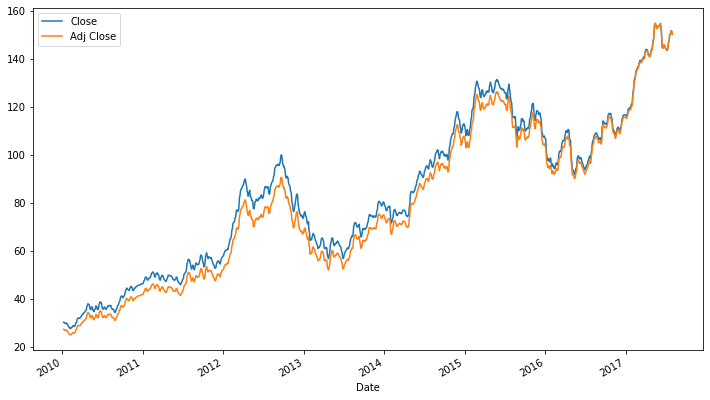

In [314]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

**My Own Example 78**

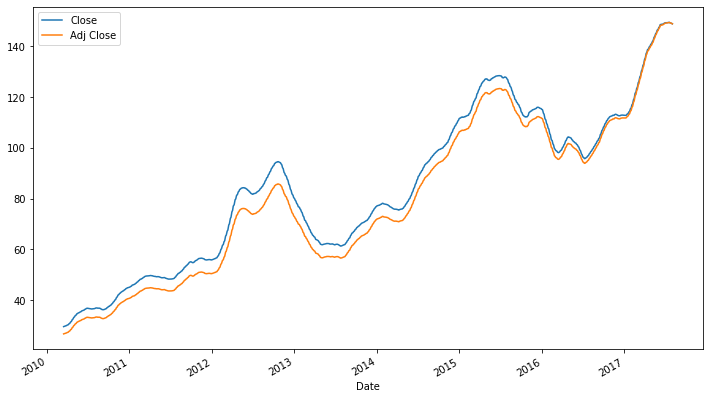

In [324]:
aapl.rolling(50)[['Close', 'Adj Close']].mean().plot();

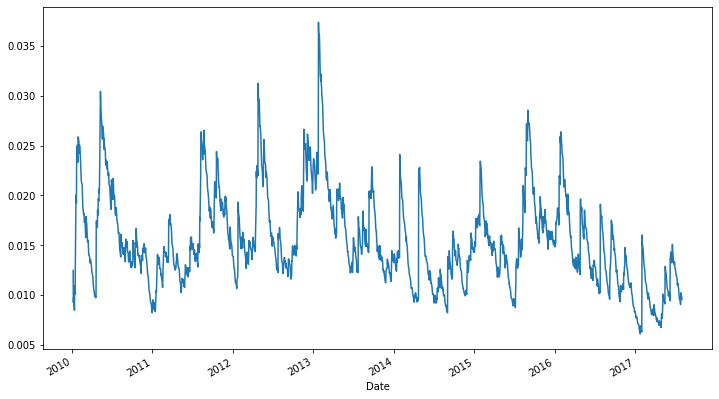

In [316]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

**My Own Example 79**

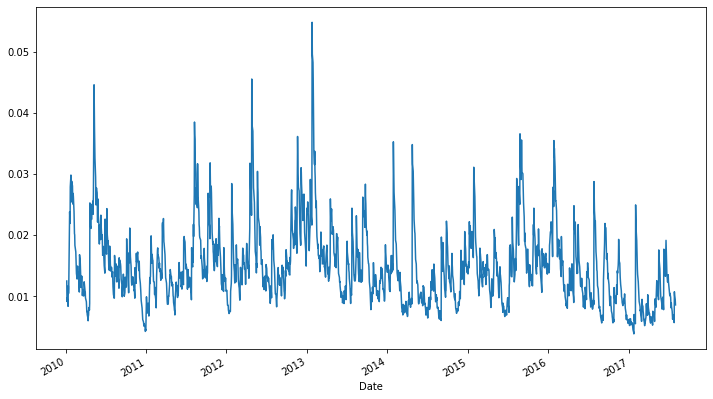

In [326]:
aapl['Close'].pct_change().ewm(span=10).std().plot();

# "Real World" Data

In [328]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


**My Own Example 80**

In [330]:
from avocados import read_avocadata

avocados = read_avocadata('2015', '2018')
avocados.head()

/content/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [329]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

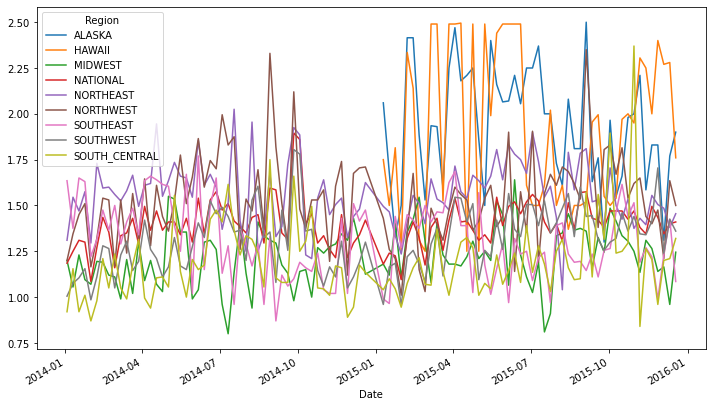

In [331]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [332]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

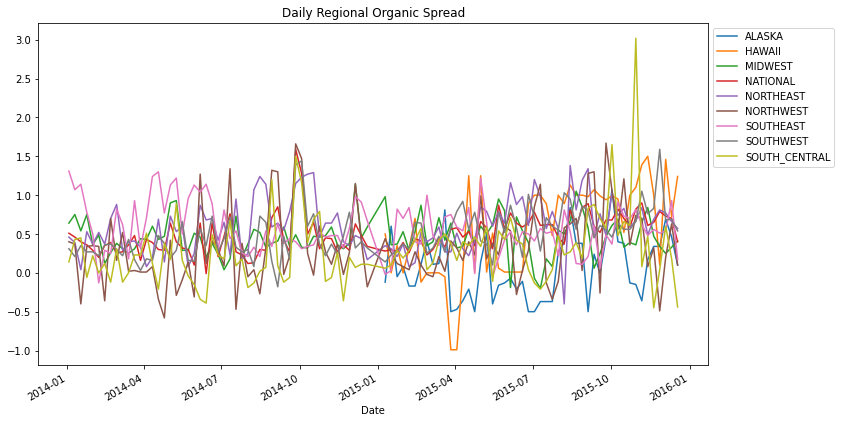

In [333]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

**My Own Example 81**

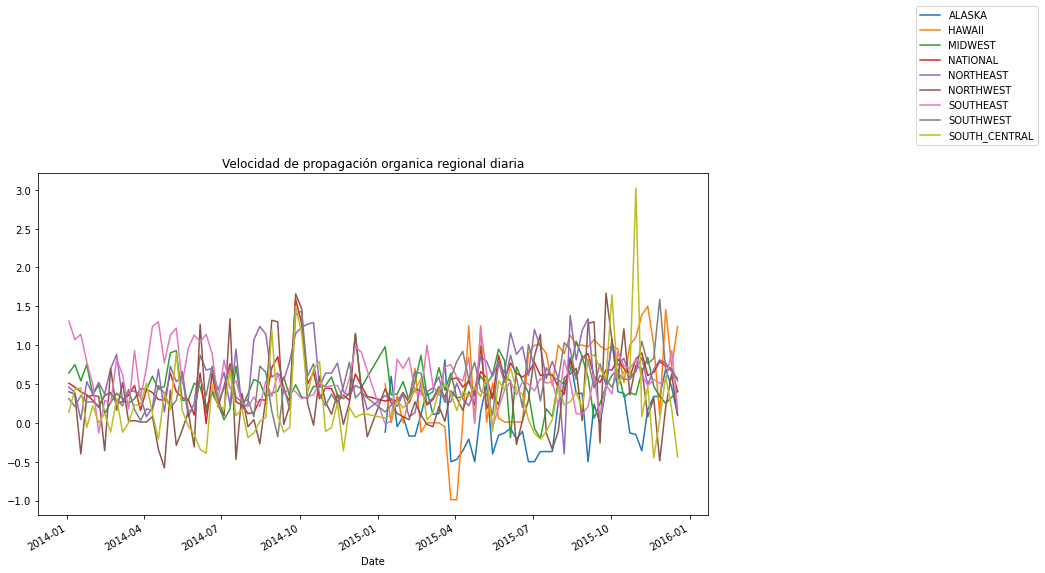

In [339]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Velocidad de propagación organica regional diaria");
plt.legend(bbox_to_anchor=(1.5, 1.5));

In [334]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


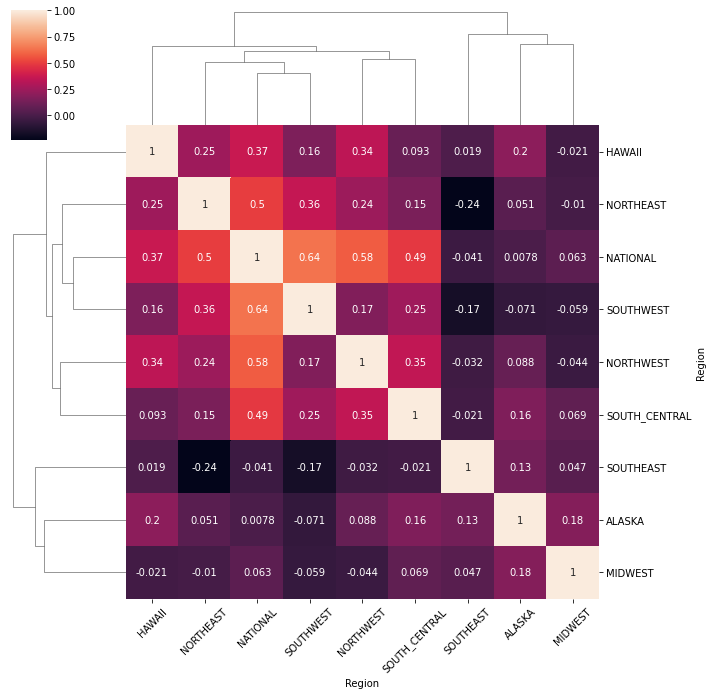

In [335]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My Own Example 82**

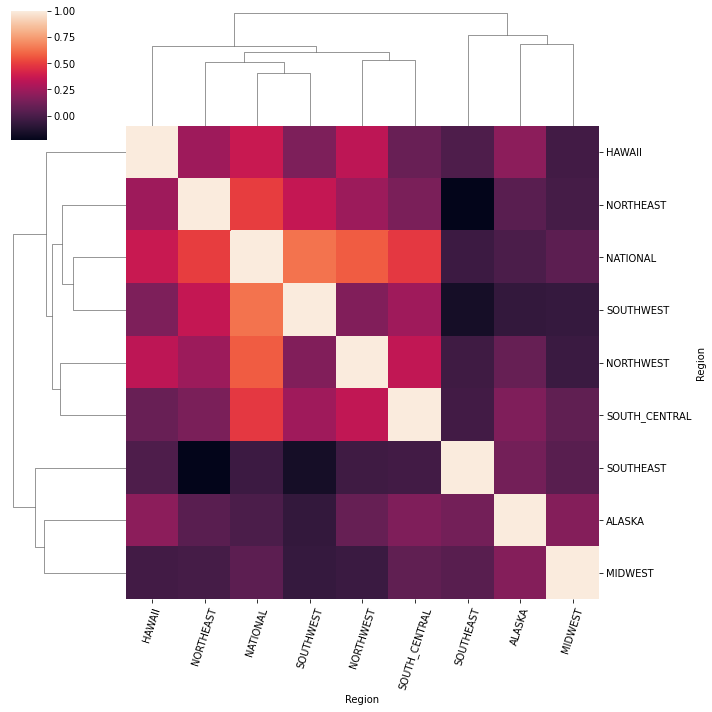

In [342]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=False)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=72);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!